<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%207/XGBoost_tugasxgboost_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rizqy Asyraff Athallah
1103210158

Upload file terlebih dahulu, lalu menampilkan beberapa baris data untuk diverifikasi

In [12]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("tugasxgboost.csv")

# Display the first few rows of the dataset to understand its structure
# and verify the actual column names
print(df.head())

# Define predictors (X) and target (y)
# Replace with the actual column names from your dataset
predictors = df.columns[:-1] # Assuming target is the last column and rest are features
# or if you know the target name replace 'target' below
# predictors = df.columns[df.columns != 'target']
target = df.columns[-1] # Assuming target is the last column

# Alternative way - list the column names manually after inspecting df.head()
# predictors = ['actual_column_name1', 'actual_column_name2', 'actual_column_name3', 'actual_column_name4']
# target = 'actual_target_name'

X = df[predictors]  # Features (independent variables)
y = df[target]      # Target (dependent variable)

Saving tugasxgboost.csv to tugasxgboost (3).csv
     X1    X2    X3   X4    X5    X6    X7        X8    X9   X10  X11  Class
0   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4      5
1   7.8  0.88  0.00  2.6  98.0  25.0  67.0    0.9968  3.20  0.68  9.8      5
2   7.8  0.76  0.04  2.3  92.0  15.0  54.0  997.0000  3.26  0.65  9.8      5
3  11.2  0.28  0.56  1.9  75.0  17.0  60.0  998.0000  3.16  0.58  9.8      6
4   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4      5


Membagi data kedalam training set dan validation

In [13]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((1279, 11), (320, 11), (1279,), (320,))

Latih model XGBRegressor


*   eval_set ditentukan untuk memantau performa model pada data pelatihan dan validasi selama pelatihan.
*   eval_metric="rmse" memberi tahu XGBoost untuk melacak Root Mean Squared Error (RMSE) selama pelatihan.



In [15]:
# Initialize the model with eval_metric
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, eval_metric="rmse")

# Train the model with the training data - eval_metric is removed from fit()
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=True)

[0]	validation_0-rmse:0.68911	validation_1-rmse:0.73252
[1]	validation_0-rmse:0.61122	validation_1-rmse:0.68571
[2]	validation_0-rmse:0.55649	validation_1-rmse:0.65920
[3]	validation_0-rmse:0.51612	validation_1-rmse:0.64524
[4]	validation_0-rmse:0.48576	validation_1-rmse:0.63689
[5]	validation_0-rmse:0.45997	validation_1-rmse:0.62183
[6]	validation_0-rmse:0.43880	validation_1-rmse:0.61725
[7]	validation_0-rmse:0.41928	validation_1-rmse:0.61194
[8]	validation_0-rmse:0.40505	validation_1-rmse:0.61097
[9]	validation_0-rmse:0.38735	validation_1-rmse:0.60976
[10]	validation_0-rmse:0.38040	validation_1-rmse:0.61199
[11]	validation_0-rmse:0.37377	validation_1-rmse:0.61433
[12]	validation_0-rmse:0.37057	validation_1-rmse:0.61463
[13]	validation_0-rmse:0.36097	validation_1-rmse:0.61156
[14]	validation_0-rmse:0.35842	validation_1-rmse:0.61277
[15]	validation_0-rmse:0.34685	validation_1-rmse:0.61056
[16]	validation_0-rmse:0.33818	validation_1-rmse:0.61031
[17]	validation_0-rmse:0.32614	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

plot_importance menunjukkan fitur mana yang paling penting dalam membuat prediksi. Fitur dengan nilai kepentingan yang lebih tinggi berkontribusi lebih besar pada prediksi model.

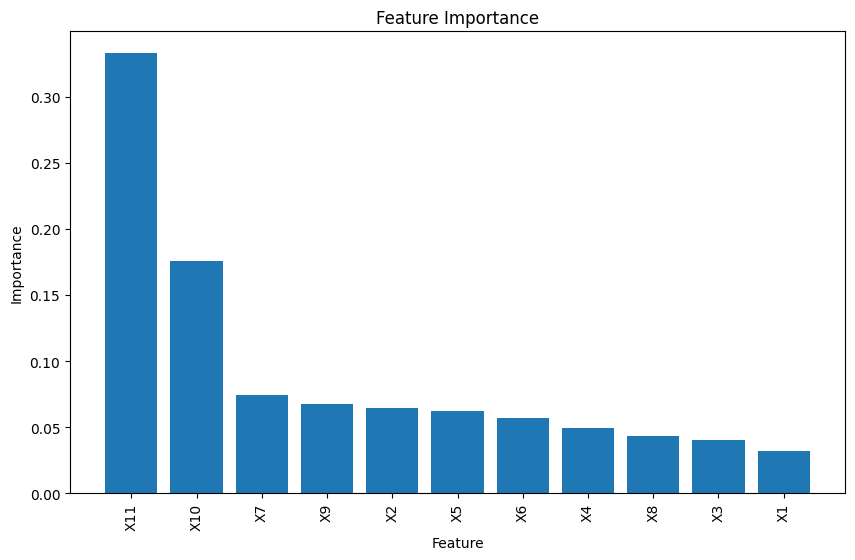

In [26]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

plot_tree memvisualisasikan salah satu pohon dari model XGBoost. Setiap pohon keputusan membuat keputusan berdasarkan pemisahan fitur, dan plot ini memungkinkan Anda untuk melihat struktur pohon.

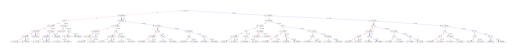

In [18]:
# Plot a specific tree from the model
xgb.plot_tree(model, num_trees=0)  # Change the num_trees index to visualize a different tree
plt.show()


Learning Curve Menunjukkan bagaimana model meningkat dari waktu ke waktu dan apakah itu overfitting.

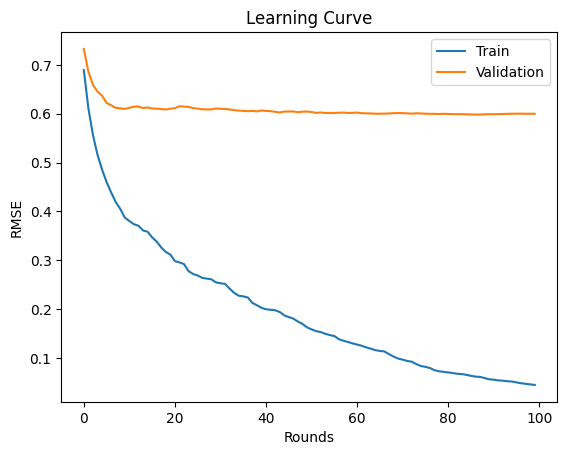

In [19]:
# Retrieve and plot the learning curve
results = model.evals_result()

plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Validation')
plt.xlabel('Rounds')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


Nilai SHAP memberikan wawasan tentang seberapa besar kontribusi setiap fitur pada setiap prediksi. Plot ringkasan membantu memvisualisasikan pentingnya fitur dan arah pengaruh (positif atau negatif) untuk setiap fitur.

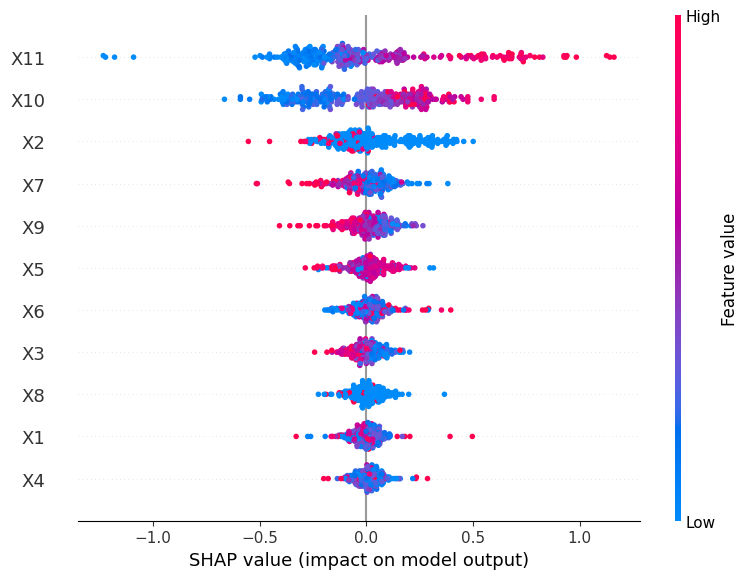

In [20]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_val)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_val)


Partial Dependence Plot menunjukkan hubungan antara fitur dan hasil yang diprediksi, sambil menjaga fitur lainnya tetap konstan. Ini dapat membantu dalam memahami efek marjinal dari setiap fitur pada variabel target.

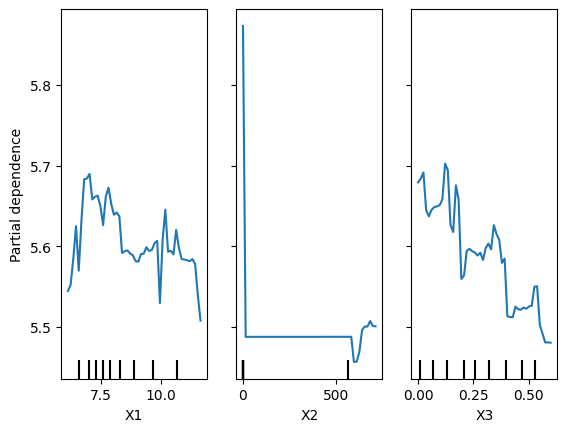

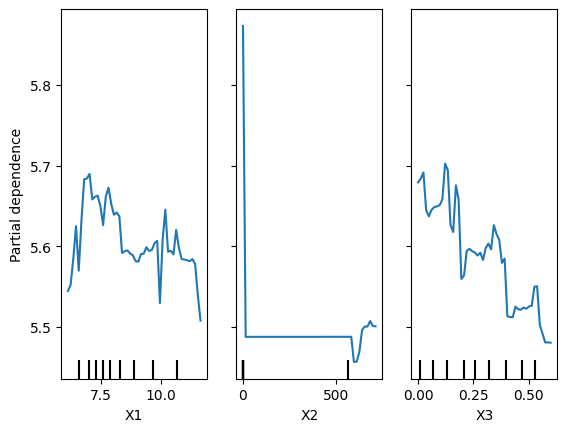

In [25]:
from sklearn.inspection import PartialDependenceDisplay

# Calculate partial dependence
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=[0, 1, 2],
    feature_names=predictors,
    grid_resolution=50,
)

# Show the plot
display.plot()
plt.show()